# Bim File

variant identifier and minor allele

In [ ]:
import pandas as pd
df_bim=pd.read_csv('Data/DataS1.bim', sep='\t', header=None)
df_map= pd.read_csv('Data/s1.map', sep='\t', header=None)
df_bim #iloc[, [1,4]]
df_map #iloc[, [1]]
# for every row if df_bim.iloc[row,1] is not df_map.iloc[:,1] drop the row
df_bim=df_bim[df_bim.iloc[:,1].isin(df_map.iloc[:,1])]
df_bim.columns=['chromosome', 'variantID', 'genetic_distance', 'position', 'minor', 'major']
df_bim

# Ped File

familly id and individual id and allels

## Split the ped file by familly id

In [ ]:
import os
! rm -r Data/out/*
 
def split_and_convert(file_path):
    # Create a directory to store output files
    os.makedirs('Data/out', exist_ok=True)
    populations = []
    with open(file_path, 'r') as ped_file:
        for row in ped_file:
            row_data = row.strip().split()
            populations.append(row_data[0])
            pedigree = row_data[0]
            with open(f'Data/out/{pedigree}.txt', 'a') as out_file:
                # Join the pairs of alleles in each row
                new_fields = row_data[:6]
                for i in range(6, len(row_data), 2):
                    new_fields.append(row_data[i] + row_data[i+1])
                # Write the new fields to the output file
                out_file.write(' '.join(new_fields) + '\n')
        
    return list(set(populations))

file_path = 'Data/s1.ped'

populations = split_and_convert(file_path)
print(populations)



In [ ]:
pop_selection = 'Sweden'
pop_path=f'Data/out/{pop_selection}.txt'
date=1 # 0-1000 years ago

In [ ]:
import pandas as pd
df = pd.read_csv(pop_path, sep=' ', header=None)

In [ ]:
# conver df_bim['variantID'] to a list
columns= df_bim['variantID'].to_list()
columns.insert(0, 'familyID')
columns.insert(1, 'individualID')
columns.insert(2, 'fatherID')
columns.insert(3, 'motherID')
columns.insert(4,'Sex')
columns.insert(5, 'date')

df.columns=columns
df.date=None

df

In [ ]:

minor=df_bim['minor'].to_list()
minor.insert(0, 'None')
minor.insert(1, 'None')
minor.insert(2, 'None')
minor.insert(3, 'None')
minor.insert(4,'None')
minor.insert(5, 'None')

minor[6]


In [ ]:
dfeuro = pd.read_excel(
    'Data/Eurasian - Dataset_tims.xlsx', sheet_name='Eurasian')
dfeuro = pd.DataFrame(dfeuro)
dfeuro.rename(columns={
              'Date mean in BP in years before 1950 CE [OxCal mu for a direct radiocarbon date, and average of range for a contextual date]': 'date'}, inplace=True)

dfeuro.info()


In [ ]:
date_range= [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000]
# if dfeuro['date'] is in the range of date_range, then dfeuro['cat_date'] is the index of the range
dfeuro['cat_date']=pd.cut(dfeuro['date'], date_range, labels=range(0, len(date_range)-1))


In [ ]:
# locate df['individualID'] in dfeuro['Master ID'] and add df['cat_date'] to the df[date]
for i in range(0, len(df)):
    for j in range(0, len(dfeuro)):
        if df['individualID'][i] == dfeuro['Master ID'][j]:
            df['date'][i]=dfeuro['cat_date'][j]

df

In [ ]:
freq={}
df=df[df['date']==date]
for i in range(6, 1000):
    # 
        minor3=minor[i]
        # number of rows in the dataframe
        count=0
        totall=len(df)*2
        for j in range(0, len(df)):
            # count occurrences of the minor allele in column i
            count+= str(df.iloc[j,i]).count(str(minor3))
        freq[df.columns[i]]=count/totall
    

freq

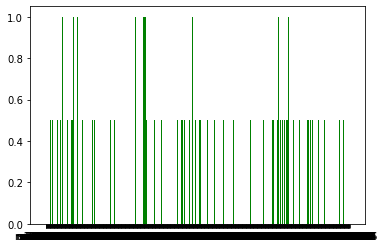

In [27]:
# The freq will be printed on the screen as admixture plots

import matplotlib.pyplot as plt
plt.bar(freq.keys(), freq.values(), color='g')
plt.show()

